<a href="https://colab.research.google.com/github/Thobeee/Hamoye-Project/blob/main/ML_Code_Club_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE COMPLETE MACHINE LEARNING EXTERNSHIP: 
WEEKLY ML CODE CLUB: 001

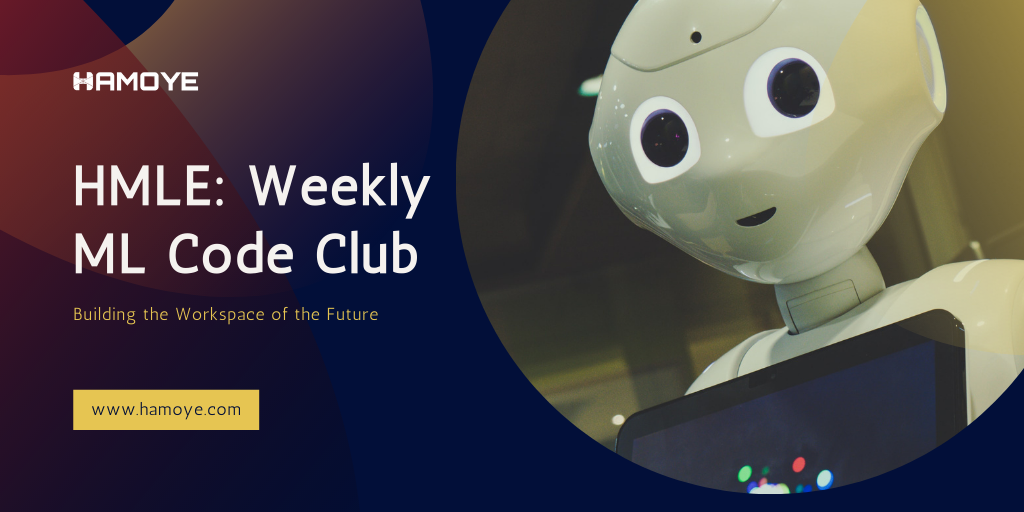

## Data Wrangling




### What is Data Wrangling?

Data wrangling is the process of taking disorganised or incomplete raw data and standardizing it so that you can easily access it. It is also referred to as Data Munging.

It involves actions like joining(linking two dataframes together based on a common column/feature), parsing data(this involves changing the datatype of certain column to make analysis easier e.g changing date that was originally in string format to datetime format to ba able to make date calculations), cleaning or filtering(selecting certain features based on some characteristics) to produce required output.

Data wrangling is important to fasten the data-to-insight journey and support timely decision-making.



### Wrangling Data from Gapminder

Gapminder is a Swedish non-profit organisation co-founded by Hans Rosling. They help produce free teaching resources making the world understandable based on reliable statistics.

#### The datsets used:

[Cell phones(total)](https://raw.githubusercontent.com/zalihat/cell_phone_dataset/master/cell_phones.csv) 

[Population(total)](https://raw.githubusercontent.com/zalihat/cell_phone_dataset/master/population1.csv)

[Geo country codes](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)

Click [here](https://drive.google.com/file/d/1yQ_OcAftqCsjFKDDQgWdBl1BoHtra7rq/view) to access the tasks

#### Part One: Load Data

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#load data
url_cellphone = 'https://raw.githubusercontent.com/zalihat/cell_phone_dataset/master/cell_phones.csv'
url_population = 'https://raw.githubusercontent.com/zalihat/cell_phone_dataset/master/population1.csv'
url_gcc = 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv'

cellphones = pd.read_csv(url_cellphone)
population = pd.read_csv(url_population)
geo_country_code = pd.read_csv(url_gcc)
cellphones.head()

,Country,year,cell_phones_total
0,Afghanistan,1960,0.0
1,Afghanistan,1961,0.0
2,Afghanistan,1962,0.0
3,Afghanistan,1963,0.0
4,Afghanistan,1964,0.0


In [ ]:
population.head()

,Country,year,population
0,Afghanistan,1800,3280000
1,Afghanistan,1801,3280000
2,Afghanistan,1802,3280000
3,Afghanistan,1803,3280000
4,Afghanistan,1804,3280000


In [ ]:
geo_country_code.head()

,country,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,un_sdg_ldc,un_sdg_region,un_state,unicef_region,unicode_region_subtag,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,un_not_least_developed,un_latin_america_and_the_caribbean,False,NaN,AW,americas,america
2,afg,g77,low_income,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,un_least_developed,un_central_and_southern_asia,True,sa,AF,asia,south_asia
3,ago,g77,middle_income,lower_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,un_least_developed,un_sub_saharan_africa,True,ssa,AO,africa,sub_saharan_africa
4,aia,others,NaN,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,un_not_least_developed,un_latin_america_and_the_caribbean,False,NaN,AI,americas,america


#### Part Two: Join Data

In [ ]:
#joining the cellphones and population dataframe
merged1 = cellphones.merge(population, how='inner', on=['Country', 'year'])
merged1.shape

(11640, 4)

In [ ]:
geo_country_code.head()

,country,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,un_sdg_ldc,un_sdg_region,un_state,unicef_region,unicode_region_subtag,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,un_not_least_developed,un_latin_america_and_the_caribbean,False,NaN,AW,americas,america
2,afg,g77,low_income,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,un_least_developed,un_central_and_southern_asia,True,sa,AF,asia,south_asia
3,ago,g77,middle_income,lower_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,un_least_developed,un_sub_saharan_africa,True,ssa,AO,africa,sub_saharan_africa
4,aia,others,NaN,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,un_not_least_developed,un_latin_america_and_the_caribbean,False,NaN,AI,americas,america


In [ ]:
#Renaming columns in geo country codes
geo_country_code.rename(columns={'country':'geo', 'name':'Country'}, inplace=True)
#inplace set to true means it should apply the change to the original dataframe
#you can only run the cell once so as not to encpunter an error
geo_country_code.head()

,geo,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,Country,un_sdg_ldc,un_sdg_region,un_state,unicef_region,unicode_region_subtag,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,un_not_least_developed,un_latin_america_and_the_caribbean,False,NaN,AW,americas,america
2,afg,g77,low_income,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,un_least_developed,un_central_and_southern_asia,True,sa,AF,asia,south_asia
3,ago,g77,middle_income,lower_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,un_least_developed,un_sub_saharan_africa,True,ssa,AO,africa,sub_saharan_africa
4,aia,others,NaN,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,un_not_least_developed,un_latin_america_and_the_caribbean,False,NaN,AI,americas,america


In [ ]:
#extract the geo and country columns from the geo_country_code dataframe
extract = geo_country_code[['geo', 'Country']]
extract.head()

,geo,Country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


In [ ]:
#merge merged1 with the extract
merged2 = merged1.merge(extract, how='inner', on='Country')
merged2.shape

(11640, 5)

#### Part Three: Make Features

In [ ]:
merged2.head()

,Country,year,cell_phones_total,population,geo
0,Afghanistan,1960,0.0,9000000,afg
1,Afghanistan,1961,0.0,9170000,afg
2,Afghanistan,1962,0.0,9350000,afg
3,Afghanistan,1963,0.0,9540000,afg
4,Afghanistan,1964,0.0,9740000,afg


In [ ]:
#calculate the number of cell phones per person and assign to a new column cell_phones_per_person
merged2['cellphones_per_person'] = merged2['cell_phones_total']/merged2['population']
merged2.head()

,Country,year,cell_phones_total,population,geo,cellphones_per_person
0,Afghanistan,1960,0.0,9000000,afg,0.0
1,Afghanistan,1961,0.0,9170000,afg,0.0
2,Afghanistan,1962,0.0,9350000,afg,0.0
3,Afghanistan,1963,0.0,9540000,afg,0.0
4,Afghanistan,1964,0.0,9740000,afg,0.0


In [ ]:
mask = merged2[(merged2['Country'] == 'United States') & (merged2['year'] == 2017)]
confirm = mask['cellphones_per_person']
confirm

11157    1.230769
Name: cellphones_per_person, dtype: float64

In [ ]:
#convert the geo column to upper case
#convert the values to string and apply the upper method
#assign this to the column in the dataframe
merged2['geo'] = merged2['geo'].str.upper() 
merged2.head()

,Country,year,cell_phones_total,population,geo,cellphones_per_person
0,Afghanistan,1960,0.0,9000000,AFG,0.0
1,Afghanistan,1961,0.0,9170000,AFG,0.0
2,Afghanistan,1962,0.0,9350000,AFG,0.0
3,Afghanistan,1963,0.0,9540000,AFG,0.0
4,Afghanistan,1964,0.0,9740000,AFG,0.0


#### Part Four: Process Data

In [ ]:
#description for numeric data
merged2.describe()

,year,cell_phones_total,population,cellphones_per_person
count,11640.000000,1.164000e+04,1.164000e+04,11640.000000
mean,1989.500000,7.875722e+06,2.710307e+07,0.235536
std,17.318846,5.572496e+07,1.086187e+08,0.433303
min,1960.000000,0.000000e+00,4.380000e+03,0.000000
25%,1974.750000,0.000000e+00,1.117500e+06,0.000000
50%,1989.500000,0.000000e+00,5.100000e+06,0.000000
75%,2004.250000,5.615000e+05,1.590000e+07,0.233667
max,2019.000000,1.730000e+09,1.430000e+09,2.126068


The year ranges from the minimum - **1960** value to the maximum - **2019** as seen in the description above. 

In [ ]:
#description for non numeric data
#pass the exclude parameter and set it to numbers
merged2.describe(exclude=np.number)

,Country,geo
count,11640,11640
unique,194,194
top,Luxembourg,VCT
freq,60,60


There are 194 unique ccountries as seen above

In [ ]:
#top 5 countries with the most cell phones total
#set number format tp return whole number
#and comma separated values
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x)) #set format for our number
df_2017 = merged2[merged2['year']==2017]
top_5 = df_2017[['Country', 'cell_phones_total']].sort_values(by='cell_phones_total', ascending=False).head()
top_5

,Country,cell_phones_total
2157,China,"1,470,000,000"
4617,India,"1,170,000,000"
4677,Indonesia,"435,000,000"
11157,United States,"400,000,000"
8577,Russia,"227,000,000"


In [ ]:
merged2[(merged2['Country'] == 'China') & (merged2['year'] == 2017)]

,Country,year,cell_phones_total,population,geo,cellphones_per_person
2157,China,2017,"1,470,000,000",1420000000,CHN,1


In [ ]:
merged2[(merged2['Country'] == 'china') & (merged2['year'] == 2017)]

,Country,year,cell_phones_total,population,geo,cellphones_per_person


In [ ]:
merged2['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana'

## References

https://www.astera.com/type/blog/data-wrangling/

https://pandas.pydata.org/pandas-docs/stable/index.html

